<a href="https://colab.research.google.com/github/aarushM923/Flower-Recognition/blob/main/flower_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.applications import MobileNetV2
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

# Change the directory to the folder containing flower_images
os.chdir('/content/drive/My Drive/flower_images')

# List the contents of the folder
print(os.listdir())

['.DS_Store', 'Orchid', 'Lilly', 'Sunflower', 'Tulip', 'Lotus', 'Flower_Recog_Model.h5', 'flower_recognition.keras']


In [4]:
import os
count = 0
# List all directories in the 'flower_images' folder
dirs = os.listdir('/content/drive/My Drive/flower_images')

# Loop through each directory
for dir in dirs:
    dir_path = os.path.join('/content/drive/My Drive/flower_images', dir)

    if os.path.isdir(dir_path):
        files = os.listdir(dir_path)

        image_count = len([file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))])

        print(f"{dir}; folder has {image_count} images")
        count = count + len(files)

print(count)

Orchid; folder has 1000 images
Lilly; folder has 999 images
Sunflower; folder has 1020 images
Tulip; folder has 1000 images
Lotus; folder has 1000 images
5021


In [5]:
base_dir = '/content/drive/My Drive/flower_images/'
img_size = 100
batch = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    batch_size = batch,
    image_size = (img_size, img_size)

)
val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    batch_size = batch,
    image_size = (img_size, img_size)

)

Found 5019 files belonging to 5 classes.
Using 4016 files for training.
Found 5019 files belonging to 5 classes.
Using 1003 files for validation.


In [7]:
flower_names = train_ds.class_names
flower_names

['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

In [8]:
import matplotlib.pyplot as plt

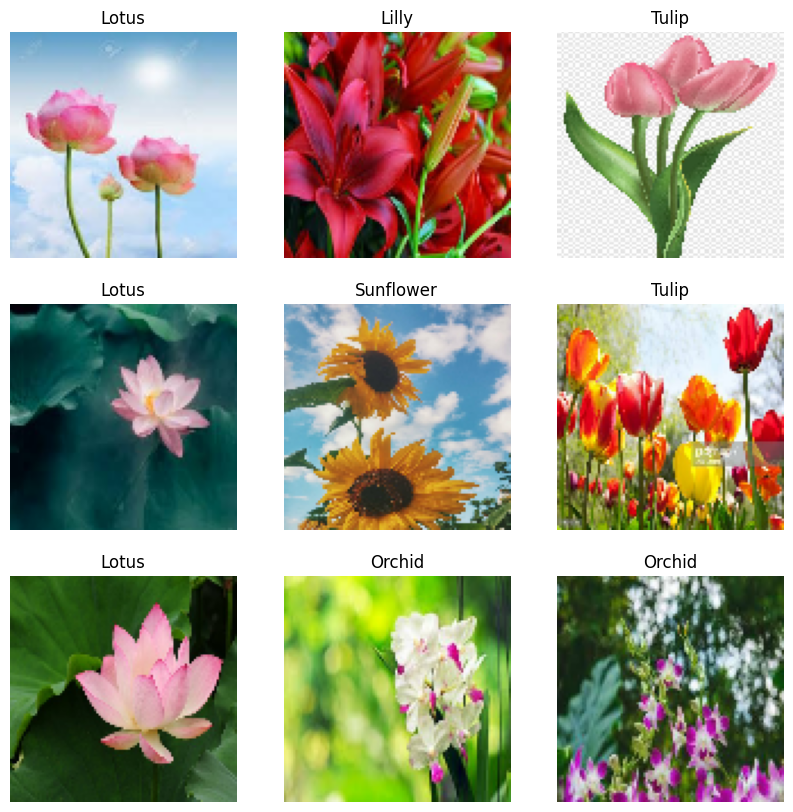

In [9]:
plt.figure(figsize=(10, 10))
i = 0
for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(flower_names[labels[i]])
    plt.axis("off")

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
#data augmentation

In [13]:
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

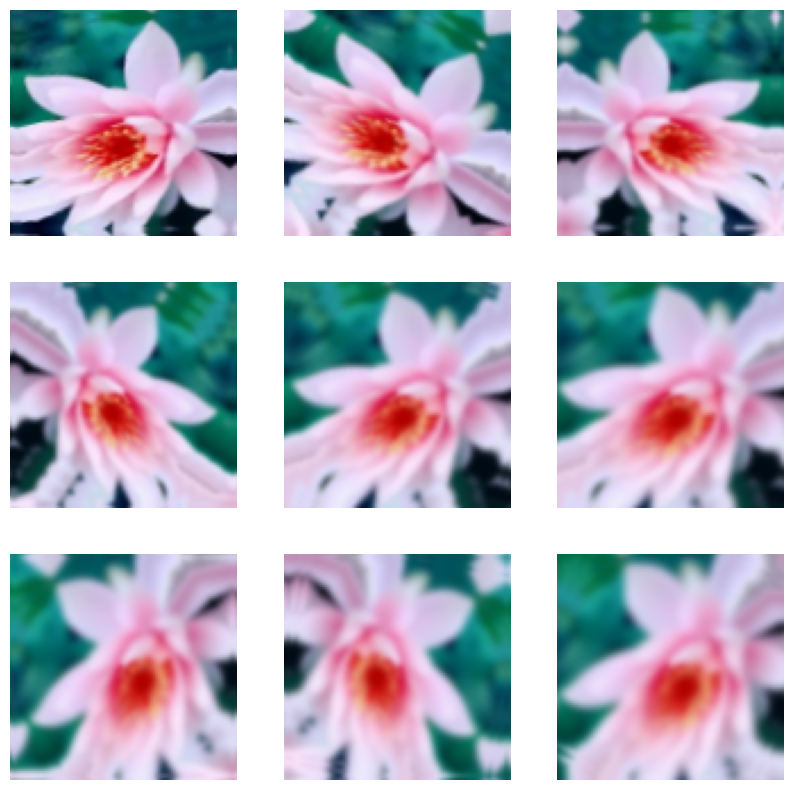

In [62]:
plt.figure(figsize=(10, 10))
i = 0
for images, labels in train_ds.take(1):
  for i in range(9):
    images = data_augmentation(images)
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.axis("off")

In [15]:
#model creation

In [16]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(flower_names))
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                 

In [21]:
history = model.fit(
    train_ds,
    epochs = 15,
    validation_data = val_ds
)

Epoch 1/15
126/126 [==============================] - 195s 2s/step - loss: 1.2953 - accuracy: 0.4507 - val_loss: 1.2191 - val_accuracy: 0.5075
Epoch 2/15
126/126 [==============================] - 50s 397ms/step - loss: 1.1004 - accuracy: 0.5543 - val_loss: 1.0261 - val_accuracy: 0.5613
Epoch 3/15
126/126 [==============================] - 50s 396ms/step - loss: 1.0040 - accuracy: 0.5964 - val_loss: 0.9412 - val_accuracy: 0.6491
Epoch 4/15
126/126 [==============================] - 48s 385ms/step - loss: 0.9307 - accuracy: 0.6362 - val_loss: 0.9703 - val_accuracy: 0.6351
Epoch 5/15
126/126 [==============================] - 49s 387ms/step - loss: 0.8731 - accuracy: 0.6551 - val_loss: 0.9410 - val_accuracy: 0.6401
Epoch 6/15
126/126 [==============================] - 48s 379ms/step - loss: 0.8325 - accuracy: 0.6770 - val_loss: 0.8723 - val_accuracy: 0.6640
Epoch 7/15
126/126 [==============================] - 48s 385ms/step - loss: 0.7800 - accuracy: 0.6940 - val_loss: 0.7612 - val_accu

In [19]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

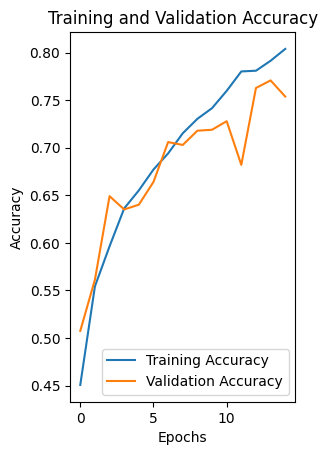

In [22]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

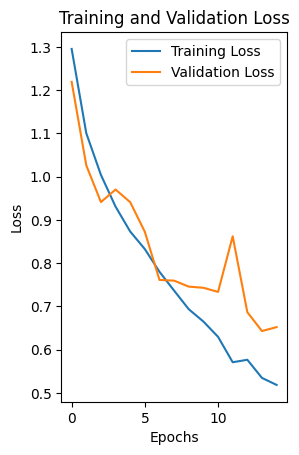

In [23]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [24]:
plt.show()

In [25]:
directory = '/content/drive/MyDrive/flower_images/Tulip'

files = os.listdir(directory)


In [26]:
directory = '/content/drive/MyDrive/flower_images/Tulip'

files = [os.path.join(directory, file) for file in os.listdir(directory)]


In [27]:
def extract_features(directory, img_size, batch_size=32):
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=False
    )

    model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
    features = model.predict(generator)
    features = features.reshape((features.shape[0], -1))

    labels = generator.classes

    return features, labels

train_features, train_labels = extract_features(base_dir, img_size)
print(f"Extracted features shape: {train_features.shape}")
print(f"Extracted labels shape: {train_labels.shape}")

Found 5020 images belonging to 5 classes.


157/157 [==============================] - 65s 407ms/step
Extracted features shape: (5020, 20480)
Extracted labels shape: (5020,)


In [28]:
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=123)
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (4016, 20480)
Validation data shape: (1004, 20480)


In [49]:
# Train SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_val)
svm_acc = accuracy_score(y_val, svm_preds)
svm_cm = confusion_matrix(y_val, svm_preds)
print(f"SVM Accuracy: {svm_acc}")

SVM Accuracy: 0.901394422310757


In [50]:
# Train k-NN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_val)
knn_acc = accuracy_score(y_val, knn_preds)
knn_cm = confusion_matrix(y_val, knn_preds)
print(f"k-NN Accuracy: {knn_acc}")

k-NN Accuracy: 0.7270916334661355


In [51]:
# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_val)
dt_acc = accuracy_score(y_val, dt_preds)
dt_cm = confusion_matrix(y_val, dt_preds)
print(f"Decision Tree Accuracy: {dt_acc}")

Decision Tree Accuracy: 0.5906374501992032


In [54]:
svm_report = classification_report(y_val, svm_preds, output_dict=True)
knn_report = classification_report(y_val, knn_preds, output_dict=True)
dt_report = classification_report(y_val, dt_preds, output_dict=True)

In [55]:
svm_report_df = pd.DataFrame(svm_report).transpose()
knn_report_df = pd.DataFrame(knn_report).transpose()
dt_report_df = pd.DataFrame(dt_report).transpose()

In [58]:
svm_report_df = svm_report_df.round(2)
knn_report_df = knn_report_df.round(2)
dt_report_df = dt_report_df.round(2)

In [59]:
print("\nSVM Classification Report:\n")
print(svm_report_df)

print("\nk-NN Classification Report:\n")
print(knn_report_df)

print("\nDecision Tree Classification Report:\n")
print(dt_report_df)


SVM Classification Report:

              precision  recall  f1-score  support
0                  0.83    0.85      0.84    194.0
1                  0.88    0.87      0.87    196.0
2                  0.90    0.91      0.90    197.0
3                  0.99    0.97      0.98    212.0
4                  0.91    0.90      0.90    205.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.90    0.90      0.90   1004.0
weighted avg       0.90    0.90      0.90   1004.0

k-NN Classification Report:

              precision  recall  f1-score  support
0                  0.54    0.75      0.63   194.00
1                  0.64    0.75      0.69   196.00
2                  0.81    0.63      0.71   197.00
3                  0.91    0.86      0.89   212.00
4                  0.87    0.64      0.74   205.00
accuracy           0.73    0.73      0.73     0.73
macro avg          0.75    0.73      0.73  1004.00
weighted avg       0.76    0.73      0.73  1004.00

Decision Tree Classifi

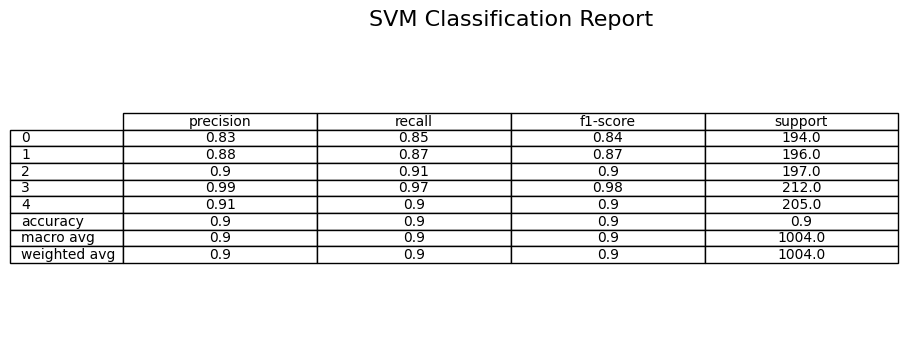

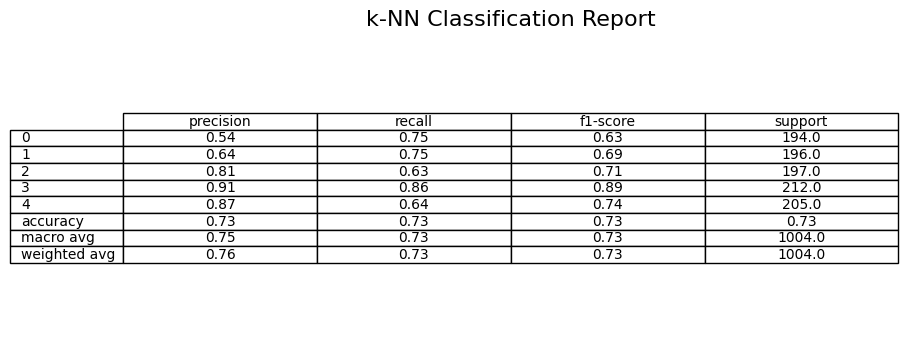

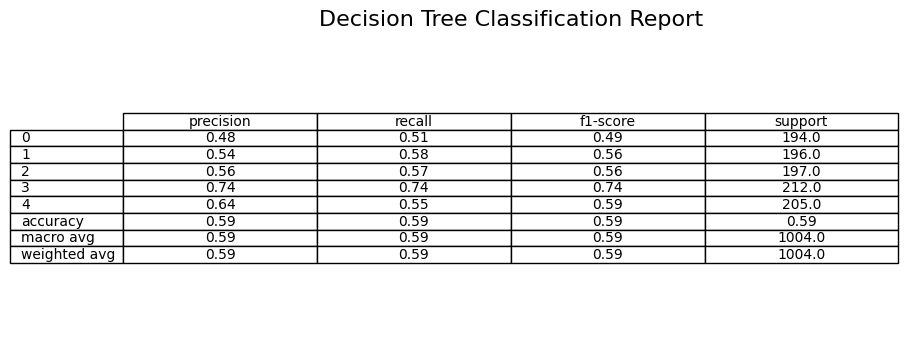

In [60]:
def display_table(report_df, title):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center')
    plt.title(title, fontsize=16)
    plt.show()

display_table(svm_report_df, "SVM Classification Report")
display_table(knn_report_df, "k-NN Classification Report")
display_table(dt_report_df, "Decision Tree Classification Report")


In [52]:
svm_cm_df = pd.DataFrame(svm_cm, index=flower_names, columns=flower_names)
knn_cm_df = pd.DataFrame(knn_cm, index=flower_names, columns=flower_names)
dt_cm_df = pd.DataFrame(dt_cm, index=flower_names, columns=flower_names)

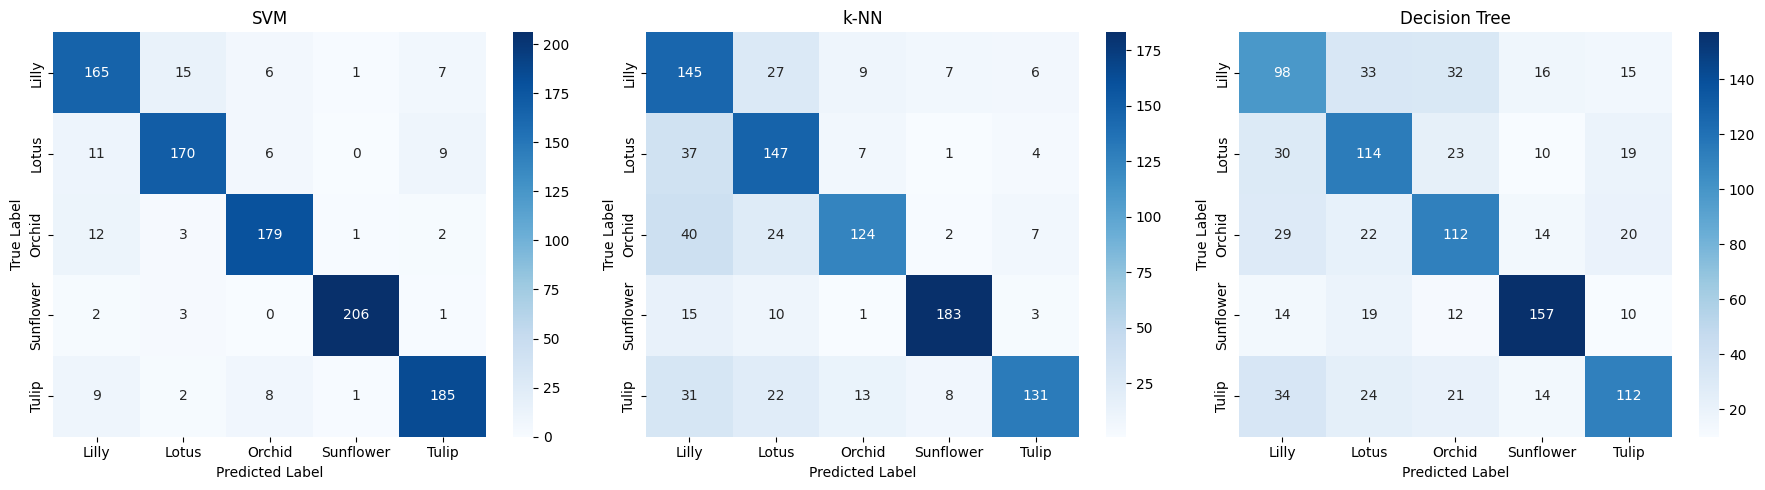

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(svm_cm_df, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('SVM')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

sns.heatmap(knn_cm_df, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('k-NN')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

sns.heatmap(dt_cm_df, annot=True, fmt='d', cmap='Blues', ax=ax[2])
ax[2].set_title('Decision Tree')
ax[2].set_xlabel('Predicted Label')
ax[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [32]:
print("\nSVM Classification Report:\n", classification_report(y_val, svm_preds))
print("\nk-NN Classification Report:\n", classification_report(y_val, knn_preds))
print("\nDecision Tree Classification Report:\n", classification_report(y_val, dt_preds))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       194
           1       0.88      0.87      0.87       196
           2       0.90      0.91      0.90       197
           3       0.99      0.97      0.98       212
           4       0.91      0.90      0.90       205

    accuracy                           0.90      1004
   macro avg       0.90      0.90      0.90      1004
weighted avg       0.90      0.90      0.90      1004


k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.75      0.63       194
           1       0.64      0.75      0.69       196
           2       0.81      0.63      0.71       197
           3       0.91      0.86      0.89       212
           4       0.87      0.64      0.74       205

    accuracy                           0.73      1004
   macro avg       0.75      0.73      0.73      1004
weighted avg      

In [41]:
print(f"SVM Confusion Matrix:\n{svm_cm}")
print(f"k-NN Confusion Matrix:\n{knn_cm}")
print(f"Decision Tree Confusion Matrix:\n{dt_cm}")

SVM Confusion Matrix:
[[165  15   6   1   7]
 [ 11 170   6   0   9]
 [ 12   3 179   1   2]
 [  2   3   0 206   1]
 [  9   2   8   1 185]]
k-NN Confusion Matrix:
[[145  27   9   7   6]
 [ 37 147   7   1   4]
 [ 40  24 124   2   7]
 [ 15  10   1 183   3]
 [ 31  22  13   8 131]]
Decision Tree Confusion Matrix:
[[103  33  28  12  18]
 [ 30 116  18  11  21]
 [ 26  24 113   7  27]
 [ 12  19   9 163   9]
 [ 21  31  25  11 117]]


In [45]:
confusion_matrices = [(svm_cm, 'SVM'), (knn_cm, 'k-NN'), (dt_cm, 'Decision Tree')]


In [47]:
for i, (cm, title) in enumerate(confusion_matrices):
    im = ax[i].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax[i].set_title(title)
    ax[i].set_xticks(np.arange(len(flower_names)))
    ax[i].set_yticks(np.arange(len(flower_names)))
    ax[i].set_xticklabels(flower_names, rotation=45, ha="right")
    ax[i].set_yticklabels(flower_names)
    ax[i].set_ylabel('True label')
    ax[i].set_xlabel('Predicted label')

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for j in range(cm.shape[0]):
        for k in range(cm.shape[1]):
            ax[i].text(k, j, format(cm[j, k], 'd'),
                       ha="center", va="center",
                       color="white" if cm[j, k] > thresh else "black")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [38]:

# Load the image
def classify_images(image_path):
  input_image = tf.keras.utils.load_img(image_path)

  input_image_resized = input_image.resize((100, 100))

  input_image_array = tf.keras.utils.img_to_array(input_image_resized)

  input_image_exp_dim = tf.expand_dims(input_image_array, 0)

  predictions = model.predict(input_image_exp_dim)

  result = tf.nn.softmax(predictions[0])
  outcome = 'The image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
  return outcome


In [61]:
classify_images('/content/lotus.jpeg')

1/1 [==============================] - 0s 333ms/step


'The image belongs to Lotus with a score of 96.46584391593933'

In [40]:
model.save('flower_recognition.keras')